In [85]:
from chess import pgn
from chesslytics import chesslytics as cl
import numpy as np
from collections import Counter
import seaborn as sns
import matplotlib.pyplot as plt

In [89]:
%matplotlib inline

In [126]:
pgn_file = open('../data/ficsgamesdb_201501_standard2000_nomovetimes_1276309.pgn')

In [148]:
num_games = 2000

In [149]:
game_list = []
curr_game = pgn.read_game(pgn_file)
while curr_game and len(game_list) < num_games:
    data = cl.data_from_Game(curr_game)
    if len(data[1]) > 10:
        game_list.append(cl.Gamestats(*data))
    curr_game = pgn.read_game(pgn_file)

In [150]:
len(game_list)

2000

In [151]:
game_lengths = [len(game.moves) for game in game_list]

In [152]:
min_length = min(game_lengths)

In [153]:
max_length = max(game_lengths)

In [154]:
move_diversity = [len(set([game.moves[i] for game in game_list if len(game.moves) > i])) for i in xrange(max_length)]

In [155]:
normalized_move_diversity = [len(set([game.moves[i] for game in game_list if len(game.moves) > i]))/float(len([1 for game in game_list if len(game.moves) > i])) for i in xrange(max_length)]

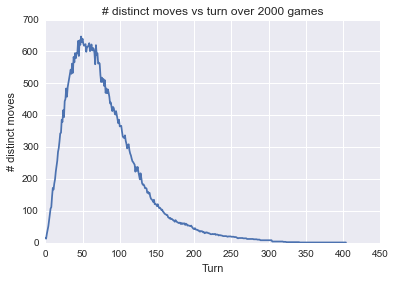

In [156]:
plt.plot(move_diversity)
plt.ylabel('# distinct moves')
plt.xlabel('Turn')
plt.title('# distinct moves vs turn over {} games'.format(num_games))
plt.savefig('distinct_moves{}.png'.format(num_games), dpi=300)

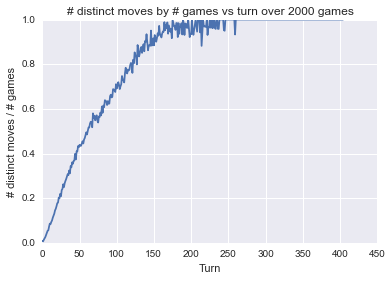

In [157]:
plt.plot(normalized_move_diversity)
plt.ylabel('# distinct moves / # games')
plt.xlabel('Turn')
plt.title('# distinct moves by # games vs turn over {} games'.format(num_games))
plt.savefig('normalized_distinct_moves{}.png'.format(num_games), dpi=300)

In [74]:
first_moves = [game.moves[1] for game in game_list]
black_player = [game.headers['Black'] for game in game_list]

In [75]:
Counter(first_moves)

Counter({'g8f6': 72, 'c7c5': 54, 'd7d5': 51, 'e7e5': 50, 'e7e6': 34, 'b8c6': 15, 'd7d6': 13, 'c7c6': 3, 'b7b6': 2, 'f7f5': 2, 'g7g6': 2, 'a7a6': 1, 'f7f6': 1})

In [40]:
g = game_list[0]

In [41]:
g

In [42]:
g.headers['Black']

'redhairfox'

In [62]:
g = [game for game in game_list if game.moves == []][0]

In [63]:
g.headers

OrderedDict([('Event', 'FICS rated standard game'), ('Site', 'FICS freechess.org'), ('Date', '2015.01.31'), ('Round', '?'), ('White', 'akoz'), ('Black', 'capafine'), ('Result', '1-0'), ('FICSGamesDBGameNo', '371402011'), ('WhiteElo', '2007'), ('BlackElo', '2002'), ('TimeControl', '900+0'), ('Time', '21:49:00'), ('WhiteClock', '0:15:00.000'), ('BlackClock', '0:15:00.000'), ('ECO', 'A00'), ('PlyCount', '0')])

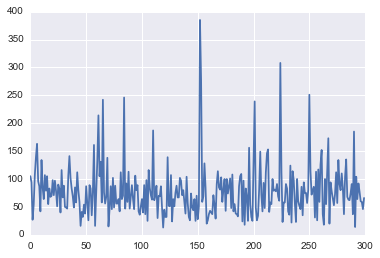

In [90]:
plt.plot(game_lengths)